In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": "--"})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

    135 : ESYS line1 SENSOR 4 - Tension at Anchor - Trained on Max values

In [2]:
feature = pd.read_csv("L_R_z_values_pass.csv", index_col=0)
label = pd.read_csv("Result_index_135.csv", index_col=1)
df = pd.merge(feature,label,on="File_ID",how="inner")
df = df[['L_values','R_anchor','z_fairlead','Max']]

In [3]:
print('Maximum value of tension at anchor (Line 1): %.6f' % df['Max'].max())
print('Minimum value of tension at anchor (Line 1): %.6f' % df['Max'].min())
print('Range for tension at anchor (Line 1): %.6f' % (df['Max'].max()-df['Max'].min()))
print('Mean for tension at anchor (Line 1): %.6f' % (np.mean(df['Max'])))

Maximum value of tension at anchor (Line 1): 11723795.119354
Minimum value of tension at anchor (Line 1): -167874.677359
Range for tension at anchor (Line 1): 11891669.796714
Mean for tension at anchor (Line 1): 2114716.793600


In [4]:
df = df.drop(df[df.Max < 0].index)

In [5]:
print('Maximum value of tension at anchor (Line 1): %.6f' % df['Max'].max())
print('Minimum value of tension at anchor (Line 1): %.6f' % df['Max'].min())
print('Range for tension at anchor (Line 1): %.6f' % (df['Max'].max()-df['Max'].min()))
print('Mean for tension at anchor (Line 1): %.6f' % (np.mean(df['Max'])))

Maximum value of tension at anchor (Line 1): 11723795.119354
Minimum value of tension at anchor (Line 1): 1106.722160
Range for tension at anchor (Line 1): 11722688.397195
Mean for tension at anchor (Line 1): 2709968.820676


In [6]:
df.head()

,L_values,R_anchor,z_fairlead,Max
File_ID,,,,
0,800,800,0,2.262890e+06
1,800,800,1,2.065994e+06
2,800,800,2,2.025394e+06
3,800,800,3,2.157927e+06
4,800,800,4,1.965799e+06


In [7]:
df.shape

(1023, 4)

In [8]:
df.isna().sum()

L_values      0
R_anchor      0
z_fairlead    0
Max           0
dtype: int64

# Reference value for 15 MW turbine

In [9]:
reference_value = df[(df['R_anchor']== 840) & (df['L_values']== 850) & (df['z_fairlead']== 14 ) ].iloc[-1]

df.iloc[[df.index.get_loc(reference_value.name)]]

,L_values,R_anchor,z_fairlead,Max
File_ID,,,,
1194,850,840,14,9.203349e+06


# Sensitivity analysis

In [10]:
# varying z_fairlead
df1 = df[(df['R_anchor']== 840) & (df['L_values']== 850) ]

# varying L
df2 = df[(df['R_anchor']== 840) & (df['z_fairlead']== 14) ]

# varying R_anchor
df3 = df[(df['L_values']== 850) & (df['z_fairlead']== 14) ]

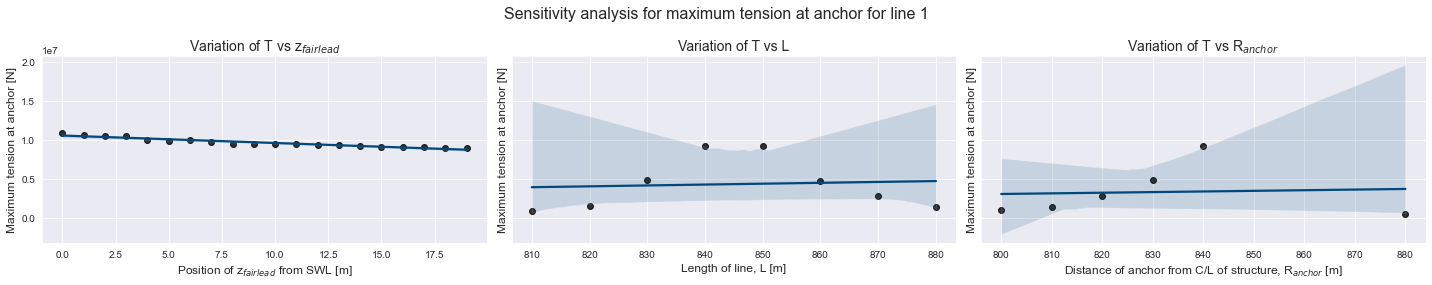

In [11]:
# Sensitivity plot
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
fig.suptitle('Sensitivity analysis for maximum tension at anchor for line 1', size = 16)

# z_fairlead
sns.regplot(ax=axes[0], x='z_fairlead', y='Max', data=df1, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[0].set_xlabel( "Position of z$_{fairlead}$ from SWL [m]" , size = 12 )
axes[0].set_ylabel( "Maximum tension at anchor [N]" , size = 12 )
axes[0].set_title('Variation of T vs z$_{fairlead}$', size = 14)

# L_values
sns.regplot(ax=axes[1],x="L_values", y="Max", data=df2, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[1].set_xlabel( "Length of line, L [m]" , size = 12 )
axes[1].set_ylabel( "Maximum tension at anchor [N]" , size = 12 )
axes[1].set_title('Variation of T vs L', size = 14)

# R_anchor
sns.regplot(ax=axes[2],x="R_anchor", y="Max", data=df3, scatter_kws={"color": "black"}, line_kws={"color": "#01497C"})
axes[2].set_xlabel( "Distance of anchor from C/L of structure, R$_{anchor}$ [m]" , size = 12 )
axes[2].set_ylabel( "Maximum tension at anchor [N]" , size = 12 )
axes[2].set_title('Variation of T vs R$_{anchor}$', size = 14)

plt.tight_layout()
plt.show()

# Check for good design in data (reference 15 MW value)

In [12]:
df4 = df[(df['L_values']< 850) & (df['Max']<= df['Max'].values[df.index.get_loc(reference_value.name)]) ]

df4.to_csv('Reference_values_att_135.csv',index=True)

# Data analysis

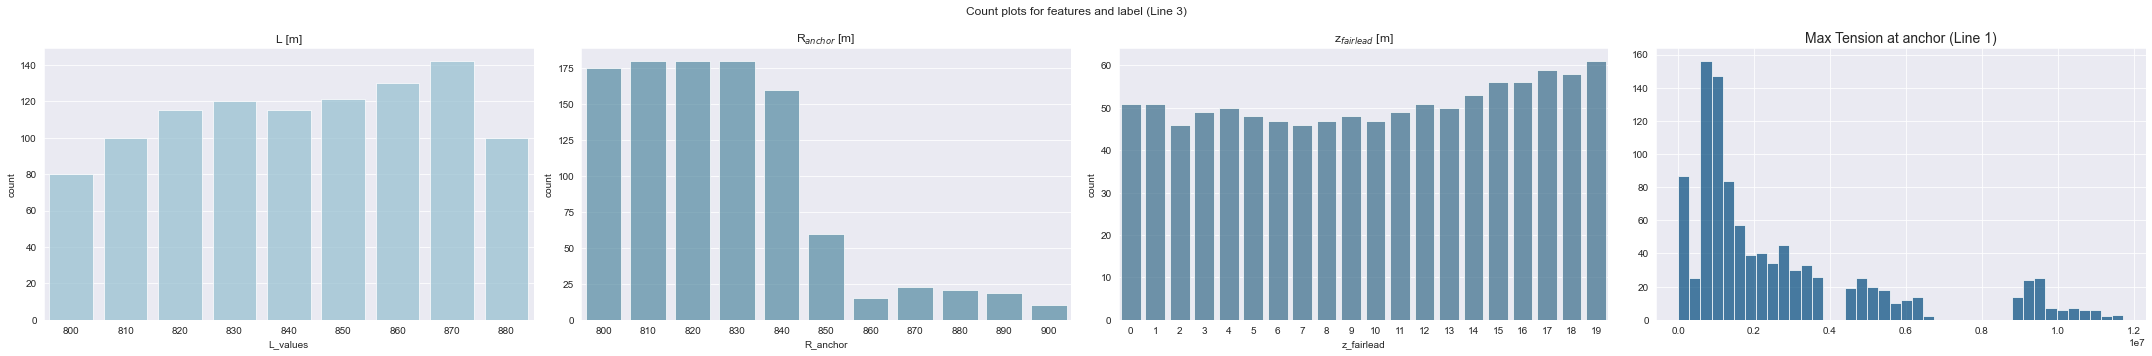

In [13]:
fig, ax = plt.subplots(1, 4,  figsize=(30,5))
fig.suptitle('Count plots for features and label (Line 3)')

# L
sns.countplot(ax=ax[0], x='L_values',data=df, color='#89C2D9', alpha=0.7)
ax[0].set_title('L [m]', size = 12)

# R_anchor
sns.countplot(ax=ax[1], x='R_anchor',data=df, color='#468FAF', alpha=0.7)
ax[1].set_title('R$_{anchor}$ [m]', size = 12)

# z_fairlead
sns.countplot(ax=ax[2], x='z_fairlead',data=df, color='#2A6F97', alpha=0.7)
ax[2].set_title('z$_{fairlead}$ [m]', size = 12)

# count tension
df.hist(ax=ax[3], column='Max',bins=40, color='#01497C', alpha=0.7)
ax[3].set_title('Max Tension at anchor (Line 1)', size = 14)

plt.tight_layout()

In [14]:
import warnings
warnings.filterwarnings("ignore")

<Figure size 720x720 with 0 Axes>

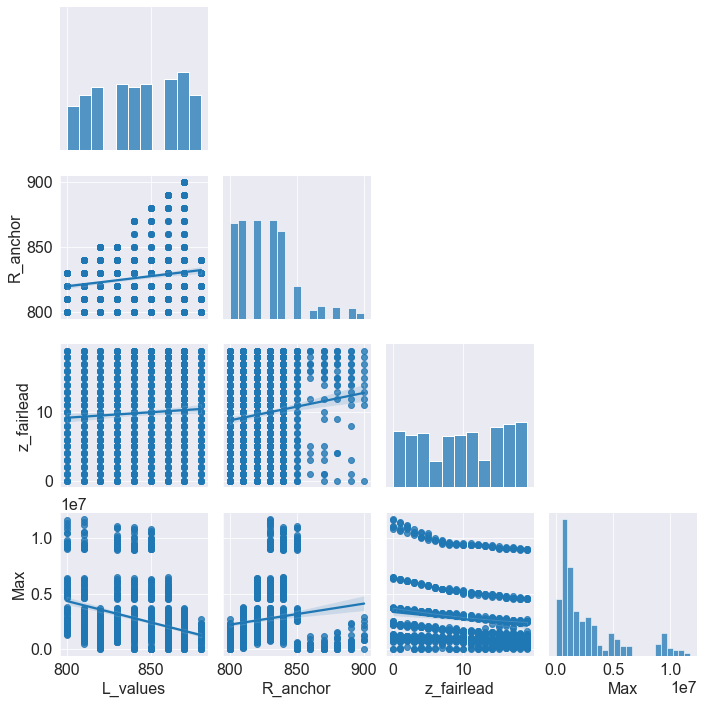

In [15]:
#pairplot to inspect relationship between dependant and independant variable
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.grid':True})
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})
sns.pairplot(df, kind='reg', corner=True)
plt.show()

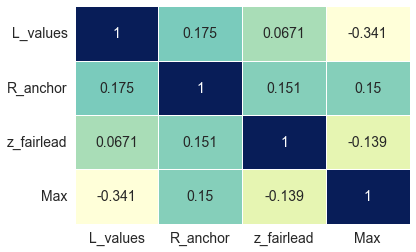

In [16]:
# plot heat map
plt.rcParams.update({'font.size': 14})
sns.heatmap(df.corr(), annot=True, fmt=".3g", linewidths=.5, cmap="YlGnBu", cbar=False)
plt.show()

In [17]:
df.describe().transpose()[['count', 'mean', 'std', 'min', 'max']]

,count,mean,std,min,max
L_values,1023.0,8.423167e+02,2.467815e+01,800.00000,8.800000e+02
R_anchor,1023.0,8.264907e+02,2.201009e+01,800.00000,9.000000e+02
z_fairlead,1023.0,9.869990e+00,5.891361e+00,0.00000,1.900000e+01
Max,1023.0,2.709969e+06,2.780710e+06,1106.72216,1.172380e+07


# Feature Scaleing

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
features=['L_values','R_anchor','z_fairlead']
labels=['Max']

In [20]:
feature_scaler=MinMaxScaler()
label_scaler=StandardScaler()

In [21]:
df[features]=feature_scaler.fit_transform(df[features].values)
df[labels]=label_scaler.fit_transform(df[labels].values)

In [22]:
import pickle 

pickle.dump(feature_scaler, open('feature_scaler_135.pkl','wb'))
pickle.dump(label_scaler, open('label_scaler_135.pkl','wb'))

In [23]:
df.head()

,L_values,R_anchor,z_fairlead,Max
File_ID,,,,
0,0.0,0.0,0.000000,-0.160857
1,0.0,0.0,0.052632,-0.231700
2,0.0,0.0,0.105263,-0.246307
3,0.0,0.0,0.157895,-0.198623
4,0.0,0.0,0.210526,-0.267749


# Split data into train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df[features],df[labels],test_size=0.2,random_state=42)

In [26]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (818, 3)
x_test shape: (205, 3)
y_train shape: (818, 1)
y_test shape: (205, 1)


In [27]:
x_train=x_train.values.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)

In [28]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (818, 3, 1)
x_test shape: (205, 3, 1)


# Model build

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History

he_normal :It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.

In [30]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu', kernel_initializer='he_normal', name = 'first_layer'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', name = 'second_layer'))
model.add(Dense(1, activation='linear', name = 'output_layer'))

# compile the keras model
model.compile(
loss = keras.losses.MeanSquaredError(),
metrics =  ['mse'],
optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

# fit the keras model on the dataset
history = History()
model.fit(x_train, y_train, epochs=2000, batch_size=64, verbose=2, callbacks=[history], validation_split=0.3, shuffle=True)

Epoch 1/2000
9/9 - 1s - loss: 0.9788 - mse: 0.9788 - val_loss: 0.8827 - val_mse: 0.8827 - 1s/epoch - 136ms/step
Epoch 2/2000
9/9 - 0s - loss: 0.9330 - mse: 0.9330 - val_loss: 0.8544 - val_mse: 0.8544 - 49ms/epoch - 5ms/step
Epoch 3/2000
9/9 - 0s - loss: 0.9076 - mse: 0.9076 - val_loss: 0.8342 - val_mse: 0.8342 - 54ms/epoch - 6ms/step
Epoch 4/2000
9/9 - 0s - loss: 0.8828 - mse: 0.8828 - val_loss: 0.8188 - val_mse: 0.8188 - 58ms/epoch - 6ms/step
Epoch 5/2000
9/9 - 0s - loss: 0.8642 - mse: 0.8642 - val_loss: 0.8071 - val_mse: 0.8071 - 62ms/epoch - 7ms/step
Epoch 6/2000
9/9 - 0s - loss: 0.8501 - mse: 0.8501 - val_loss: 0.7978 - val_mse: 0.7978 - 68ms/epoch - 8ms/step
Epoch 7/2000
9/9 - 0s - loss: 0.8398 - mse: 0.8398 - val_loss: 0.7888 - val_mse: 0.7888 - 73ms/epoch - 8ms/step
Epoch 8/2000
9/9 - 0s - loss: 0.8308 - mse: 0.8308 - val_loss: 0.7798 - val_mse: 0.7798 - 69ms/epoch - 8ms/step
Epoch 9/2000
9/9 - 0s - loss: 0.8189 - mse: 0.8189 - val_loss: 0.7704 - val_mse: 0.7704 - 82ms/epoch - 9

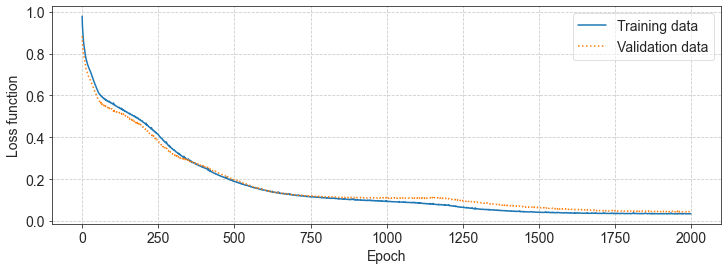

In [31]:
# recored of history of validation vs training loss
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], linewidth=1.5)
plt.plot(history.history['val_loss'], ":")
plt.title('model loss')
plt.ylabel('Loss function')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='best', fancybox=True, framealpha=0.6)
plt.grid(True)
plt.show()

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 20)                80        
                                                                 
 second_layer (Dense)        (None, 10)                210       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


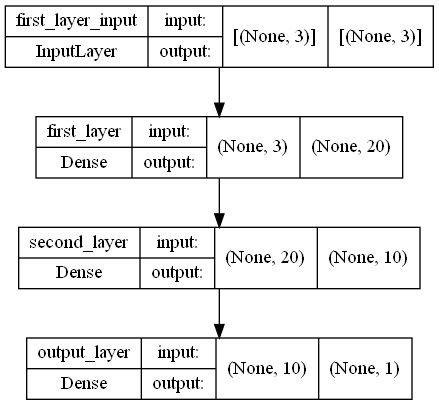

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

# Prediction

In [34]:
yhat = model.predict(x_test)

# Model performane

In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

In [36]:
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

MAE: 0.115


In [37]:
r2 = r2_score(y_test, yhat)
print('R-squared: %.3f' % r2)

R-squared: 0.967


In [38]:
y_new_inverse = label_scaler.inverse_transform(yhat)

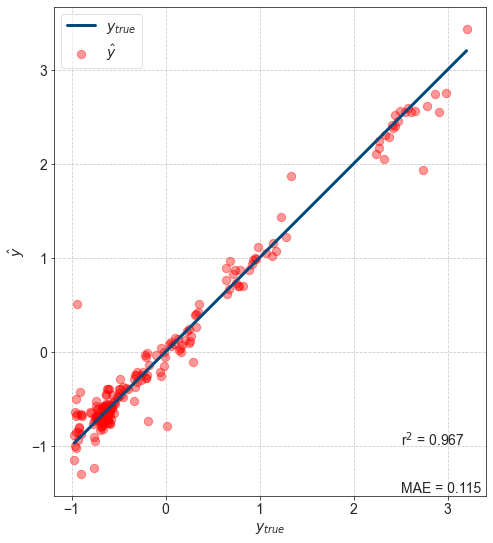

In [40]:
plt.figure(figsize=(9,9))
plt.rcParams.update({'font.size': 14})
plt.axes(aspect='equal')
sns.lineplot(x=y_test.iloc[:,0], y=y_test.iloc[:,0], linewidth=3, color='#01497C', label='$y_{true}$')
plt.scatter(x=y_test.iloc[:,0], y=yhat[:,0], c="red", label='$\hat{y}$', s=70, alpha = 0.4)

plt.annotate("r$^2$ = {:.3f}".format(r2), (2.5, -1))
plt.annotate("MAE = {:.3f}".format(error), (2.5, -1.5))

plt.xlabel('$y_{true}$')
plt.ylabel('$\hat{y}$')

plt.legend(loc='upper left', fancybox=True, framealpha=0.6)
plt.title('Validation of the prediction model')     
plt.grid(True)

plt.show()

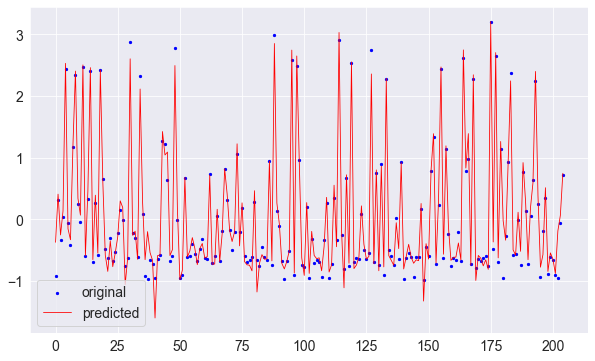

In [37]:
x_ax = range(len(yhat))
plt.figure(figsize=(10,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, yhat, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [38]:
# save model
model.save('model_attribute_135')

INFO:tensorflow:Assets written to: model_attribute_135\assets
